# Exploration Data Analysis

## Q1: สรุปข้อมูล (Data Summary)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

### a.) โหลดชุดข้อมูล Titanic

In [50]:
df = pd.read_csv("titanic_data.csv")

### b.) แสดงบางส่วนของข้อมูล

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### c) แต่ละคอลัมน์มีประเภทข้อมูล (data types) เป็นอะไรบ้าง?

In [52]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Q2: สถิติเชิงพรรณนา (Descriptive Statistics)

### a) คํานวณและอธิบายค่าเฉลี่ย (mean), ค่ามัธยฐาน (median), ค่าโหมด (mode), ค่าส่วนเบี่ยงเบนมาตรฐาน (standard deviation), และช่วงควอไทล์ (interquartile range, IQR) สําหรับคอลัมน์ที่เปNนตัวเลข?

In [53]:
for i in df.head():
  if df[i].dtype in [np.dtype('int64'), np.dtype('float64')]:
    print(f'''Column : {i} \nMean : {df[i].mean()} \nMedian : {df[i].median()} \nMode : {df[i].mode()}\nStandard Deviation : {df[i].std()}\n----------------------------------''')

Column : PassengerId 
Mean : 446.0 
Median : 446.0 
Mode : 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
Standard Deviation : 257.3538420152301
----------------------------------
Column : Survived 
Mean : 0.3838383838383838 
Median : 0.0 
Mode : 0    0
Name: Survived, dtype: int64
Standard Deviation : 0.4865924542648575
----------------------------------
Column : Pclass 
Mean : 2.308641975308642 
Median : 3.0 
Mode : 0    3
Name: Pclass, dtype: int64
Standard Deviation : 0.836071240977049
----------------------------------
Column : Age 
Mean : 29.69911764705882 
Median : 28.0 
Mode : 0    24.0
Name: Age, dtype: float64
Standard Deviation : 14.526497332334042
----------------------------------
Column : SibSp 
Mean : 0.5230078563411896 
Median : 0.0 
Mode : 0    0
Name: SibSp, dtype: int64
Standard Deviation : 1.1027434322934317
----------------------------------
Column

### b) คํานวณค่าส่วนเบี่ยงเบน (skewness) สําหรับคอลัมน์ที่เป็นตัวเลข ค่าดังกล่าวบอกอะไรเกี่ยวกับการกระจายตัว (distribution) ของตัวแปรแต่ละตัว?

In [54]:
for i in df.head():
  if df[i].dtype in [np.dtype('int64'), np.dtype('float64')]:
    skewness = df[i].skew()
    distype = "normal"
    if skewness > 0:
      distype = "left"
    elif skewness < 0:
      distype = "right"
    elif skewness == 0:
      distype = "normal"
    print(f'''Column : {i} \nSkewness : {skewness}\ndistribution type : {distype}\n------------------------''')

Column : PassengerId 
Skewness : 0.0
distribution type : normal
------------------------
Column : Survived 
Skewness : 0.4785234382949897
distribution type : left
------------------------
Column : Pclass 
Skewness : -0.6305479068752845
distribution type : right
------------------------
Column : Age 
Skewness : 0.38910778230082704
distribution type : left
------------------------
Column : SibSp 
Skewness : 3.6953517271630565
distribution type : left
------------------------
Column : Parch 
Skewness : 2.7491170471010933
distribution type : left
------------------------
Column : Fare 
Skewness : 4.787316519674893
distribution type : left
------------------------


### c) สรุปการกระจายตัวของแต่ละคอลัมน์ที่เป็นประเภทเชิงพรรณนา (categorical columns) ในชุดข้อมูล?

```
Column : PassengerId
distribution type : normal
------------------------
Column : Survived
distribution type : left
------------------------
Column : Pclass
distribution type : right
------------------------
Column : Age
distribution type : left
------------------------
Column : SibSp
distribution type : left
------------------------
Column : Parch
distribution type : left
------------------------
Column : Fare
distribution type : left
------------------------
```

## Q3: การตรวจหาข้อมูลที่ขาดหาย และผิดปกติ (Missing Data, Outliers)

### a) ตรวจสอบว่ามีค่าที่ขาดหาย (missing values) ในชุดข้อมูลหรือไม่ คอลัมน์ใดบ้างที่มีค่าที่ขาดหาย?

In [55]:
for i in df.head():
  if df[i].isnull().sum():
    print(i)

Age
Cabin
Embarked


### b) แสดงภาพข้อมูลที่ขาดหายโดยใช้ heatmap จาก heatmap เราสามารถสรุปอะไรได้บ้าง?

<Axes: >

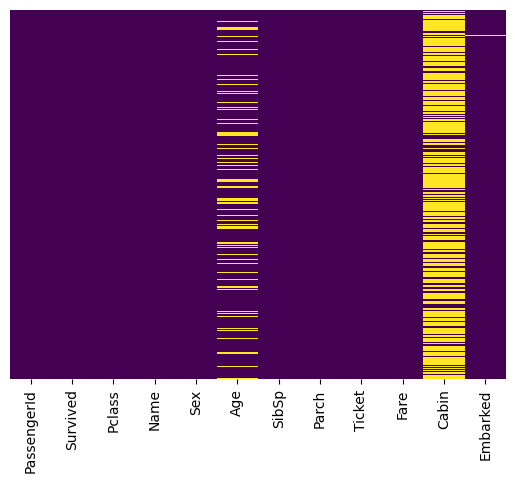

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

จาก heatmap พบว่า column Cabin มี missing value มากที่สุด รองลงมาคือ Column Age และ Column Embarked มี missing value นิดเดียว

### c) จงยกตัวอย่างสองถึงสามตัวแปรที่มีค่าผิดปกติ (outliers) และอธิบายว่าคุณตรวจพบค่าผิดปกติเหล่านี้ได้อย่างไร

In [57]:
for i in df.head():
  if df[i].dtype in [np.dtype('int64'), np.dtype('float64')]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    upper_array = np.where(df[i] >= upper)[0]
    lower_array = np.where(df[i] <= lower)[0]
    print(f"column : {i} , lower_outlier : {lower} , upper_outlier : {upper}")

column : PassengerId , lower_outlier : -444.0 , upper_outlier : 1336.0
column : Survived , lower_outlier : -1.5 , upper_outlier : 2.5
column : Pclass , lower_outlier : 0.5 , upper_outlier : 4.5
column : Age , lower_outlier : -6.6875 , upper_outlier : 64.8125
column : SibSp , lower_outlier : -1.5 , upper_outlier : 2.5
column : Parch , lower_outlier : 0.0 , upper_outlier : 0.0
column : Fare , lower_outlier : -26.724 , upper_outlier : 65.6344


จากการคำนวณใช้สูตร

![](https://lh4.googleusercontent.com/proxy/2vIXjQd-ujJdKBaAVrW-sGSXTdEZ3R-t-INR1A1ua4sNAe9pyzNHTQiMKGo3uJlf2vb1sERHktU73Njh3gZJ_6LAks6X0w)

ซึ่ง column จากตัวอย่างมี Age, Fare และ Pclass

## Q4: การแสดงข้อมูลด้วยกราฟ (Data Visualization)

### a) สร้างฮิสโตแกรม (histograms) สําหรับคอลัมน์อายุ (Age) และค่าโดยสาร (Fare) กราฟฮิสโตแกรมบอกอะไรเกี่ยวกับการกระจายตัวของตัวแปรเหล่านี้บ้าง?

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

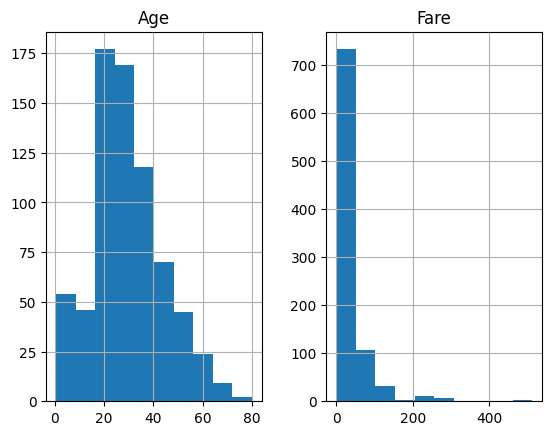

In [58]:
select_var = ['Age','Fare']
df[select_var].hist()

```
Column : Age
distribution type : left

Column : Fare
distribution type : left
```

### b) สร้างกล่องกราฟ (box plots) สําหรับคอลัมน์อายุ (Age), ค่าโดยสาร (Fare), และจํานวนพี่น้อง/คู่สมรส (SibSp) กราฟกล่องบอกอะไรเกี่ยวกับการกระจายตัวและค่าผิดปกติ (outliers) ของตัวแปรเหล่านี้บ้าง?

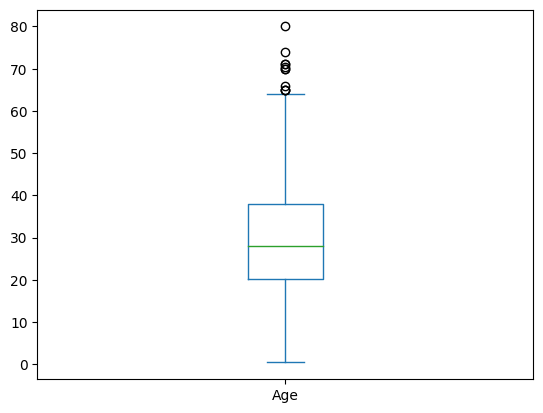

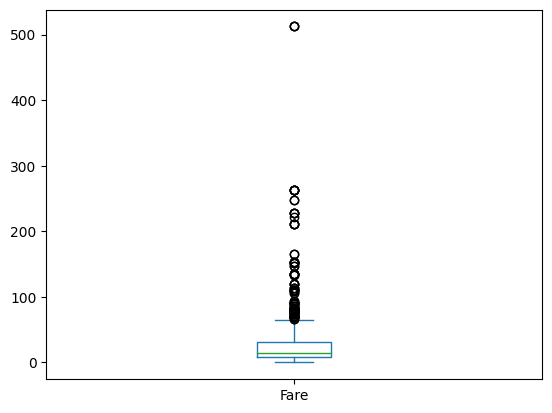

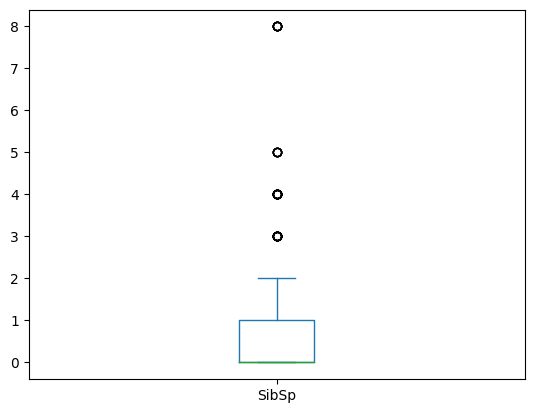

In [59]:
for i in ["Age", "Fare", "SibSp"]:
  df[i].plot.box()
  plt.show()

จาก box plot ใช้ outlier ด้วยสูตร

![](https://lh4.googleusercontent.com/proxy/2vIXjQd-ujJdKBaAVrW-sGSXTdEZ3R-t-INR1A1ua4sNAe9pyzNHTQiMKGo3uJlf2vb1sERHktU73Njh3gZJ_6LAks6X0w)

```
column : Age , lower_outlier : -6.6875 , upper_outlier : 64.8125
column : Fare , lower_outlier : -26.724 , upper_outlier : 65.6344
column : SibSp , lower_outlier : -1.5 , upper_outlier : 2.5
```

จำนวนค่า outlier

Fare > Age > SibSp

## Q5: การสํารวจความสัมพันธ์ระหว่างคอลัมน์ตัวเลข (Exploring Relationships between Numerical Columns)

### a) คํานวณค่าสัมประสิทธิ์สหสัมพันธ์แบบเพียร์สัน (Pearson correlation coefficient) ระหว่างอายุ (Age) และค่าโดยสาร (Fare) แล้วอธิบายผลลัพธ์?

In [60]:
df[["Age","Fare"]].corr(method="pearson").loc["Age","Fare"]

0.09606669176903912

ผลลัพธ์คือมีความสัมพันธ์ในรูปแบบ สัมพันธ์น้อยมาก

### b) สร้างกราฟกระจาย (scatter plot) เพื่อแสดงความสัมพันธ์ระหว่างอายุ (Age) และค่าโดยสาร (Fare) คุณสังเกตเห็นรูปแบบใดบ้าง?

<Axes: xlabel='Age', ylabel='Fare'>

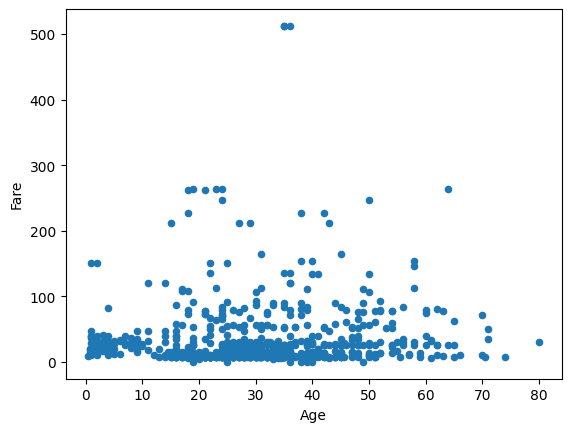

In [61]:
df.plot.scatter(x="Age", y="Fare")

แทบจะดูไม่ออกในเรื่องของความสัมพันธ์ (มีความสัมพันธ์น้อยมาก)

### c) สร้าง pairplot สําหรับอายุ (Age), ค่าโดยสาร (Fare), และจํานวนพี่น้อง/คู่สมรส (SibSp) คุณสามารถสรุปข้อมูลเชิงลึกอะไรจาก pairplot นี้บ้าง?

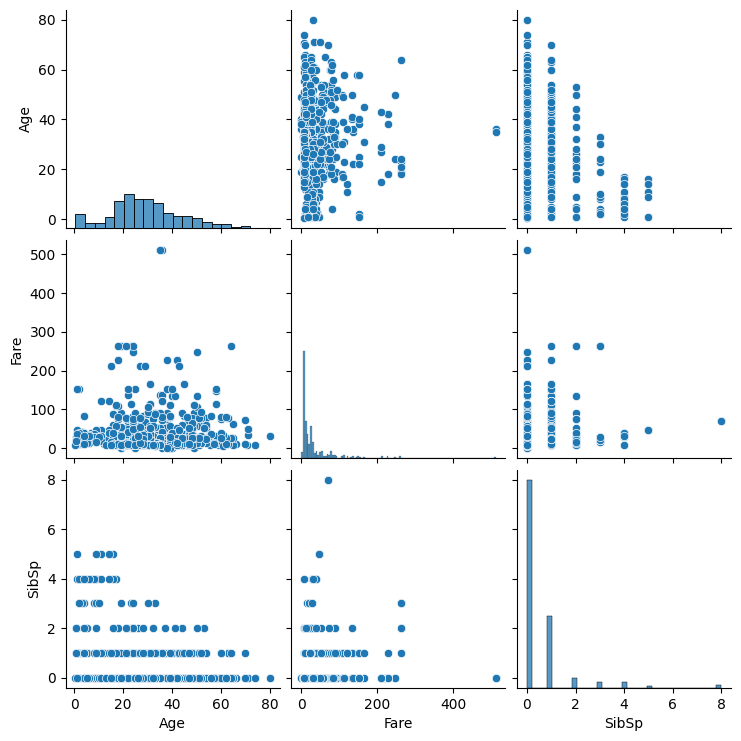

In [62]:
sns.pairplot(df[['Age','Fare','SibSp']])

จากข้อมูลพบว่า ไม่มีคู่ไหนที่มีความสัมพันธ์เลย

## Q6: การสํารวจความสัมพันธ์ระหว่างคอลัมนmเชิงพรรณนา (Exploring Relationships between Categorical Columns)

### a) สร้างตารางแจกแจง (contingency table) เพื่อแสดงการกระจายตัวของการรอดชีวิต (Survival) ในแต่ละประเภทชั้นโดยสาร (Pclass) ตารางนี้บอกอะไรเกี่ยวกับอัตราการรอดชีวิตในแต่ละชั้นโดยสารบ้าง?

In [63]:
contingency_table = pd.crosstab(df['Survived'], df['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived', ylabel='count'>

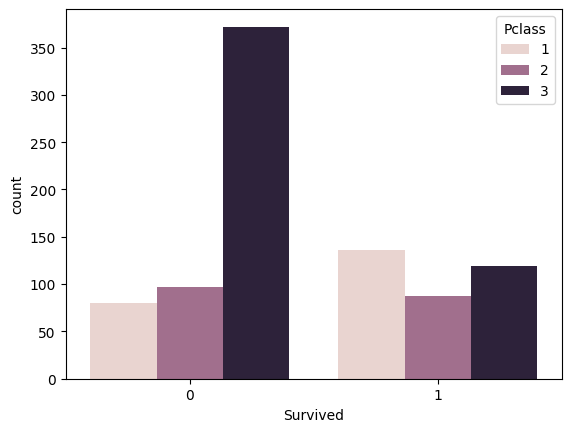

In [64]:
sns.countplot(data=df, x="Survived", hue="Pclass")

- Pclass ประเภท 3 มีอัตราการเสียชีวิตมากที่สุด
- อัตราการรอดชีวิตทั้ง 3 Pclass พอๆ กัน

### b) ทําการทดสอบไคสแควร์ (Chi-Square Test of Independence) เพื่อหาว่ามีความสัมพันธ์อย่างมีนัยสําคัญระหว่างการรอดชีวิต (Survival) และชั้นโดยสาร (Pclass) หรือไม่ ผลลัพธ์ของการทดสอบเป็นอย่างไร?

In [65]:
from scipy.stats import chi2_contingency
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Display the results
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2: 102.88898875696056, p-value: 4.549251711298793e-23, Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


มีความสัมพันธ์กันอย่างชัดเจน